In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
import pylab as plt

In [3]:
f19=pd.read_csv('players_19.csv') #import de mi dataset
f19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [4]:
clubsbien = ['KRC Genk', 'Beerschot AC', 'SV Zulte-Waregem', 'Sporting Lokeren',
       'KSV Cercle Brugge', 'RSC Anderlecht', 'KAA Gent', 'RAEC Mons',
       'FCV Dender EH', 'Standard de Liège', 'KV Mechelen',
       'Club Brugge KV', 'KSV Roeselare', 'KV Kortrijk', 'Tubize',
       'Royal Excel Mouscron', 'KVC Westerlo', 'Sporting Charleroi',
       'Sint-Truidense VV', 'Lierse SK', 'KAS Eupen',
       'Oud-Heverlee Leuven', 'Waasland-Beveren', 'KV Oostende',
       'Manchester United', 'Newcastle United', 'Arsenal',
       'West Bromwich Albion', 'Sunderland', 'Liverpool',
       'West Ham United', 'Wigan Athletic', 'Aston Villa',
       'Manchester City', 'Everton', 'Blackburn Rovers', 'Middlesbrough',
       'Tottenham Hotspur', 'Bolton Wanderers', 'Stoke City', 'Hull City',
       'Fulham', 'Chelsea', 'Portsmouth', 'Birmingham City',
       'Wolverhampton Wanderers', 'Burnley', 'Blackpool', 'Swansea City',
       'Queens Park Rangers', 'Norwich City', 'Southampton', 'Reading',
       'Crystal Palace', 'Cardiff City', 'Leicester City', 'Bournemouth',
       'Watford', 'AJ Auxerre', 'FC Nantes', 'Girondins de Bordeaux',
       'SM Caen', 'Le Havre AC', 'OGC Nice', 'Le Mans FC', 'FC Lorient',
       'Olympique Lyonnais', 'Toulouse FC', 'AS Monaco',
       'Paris Saint-Germain', 'AS Nancy-Lorraine', 'LOSC Lille',
       'Stade Rennais FC', 'Olympique de Marseille',
       'FC Sochaux-Montbéliard', 'Grenoble Foot 38', 'Valenciennes FC',
       'AS Saint-Étienne', 'RC Lens', 'Montpellier Hérault SC',
       "US Boulogne Cote D'Opale", 'AC Arles-Avignon',
       'Stade Brestois 29', 'AC Ajaccio', 'Évian Thonon Gaillard FC',
       'Dijon FCO', 'Stade de Reims', 'SC Bastia', 'ES Troyes AC',
       'En Avant de Guingamp', 'FC Metz', 'Angers SCO', 'GFC Ajaccio',
       'FC Bayern Munich', 'Hamburger SV', 'Bayer 04 Leverkusen',
       'Borussia Dortmund', 'FC Schalke 04', 'Hannover 96',
       'VfL Wolfsburg', '1. FC Köln', 'Eintracht Frankfurt',
       'Hertha BSC Berlin', 'DSC Arminia Bielefeld', 'SV Werder Bremen',
       'FC Energie Cottbus', 'TSG 1899 Hoffenheim',
       'Borussia Mönchengladbach', 'VfB Stuttgart', 'Karlsruher SC',
       'VfL Bochum', 'SC Freiburg', '1. FC Nürnberg', '1. FSV Mainz 05',
       '1. FC Kaiserslautern', 'FC St. Pauli', 'FC Augsburg',
       'Fortuna Düsseldorf', 'SpVgg Greuther Fürth',
       'Eintracht Braunschweig', 'SC Paderborn 07', 'FC Ingolstadt 04',
       'SV Darmstadt 98', 'Atalanta', 'Siena', 'Cagliari', 'Lazio',
       'Catania', 'Genoa', 'Chievo Verona', 'Reggio Calabria',
       'Fiorentina', 'Juventus', 'Milan', 'Bologna', 'Roma', 'Napoli',
       'Sampdoria', 'Inter', 'Torino', 'Lecce', 'Udinese', 'Palermo',
       'Bari', 'Livorno', 'Parma', 'Cesena', 'Brescia', 'Novara',
       'Pescara', 'Hellas Verona', 'Sassuolo', 'Empoli', 'Frosinone',
       'Carpi', 'Vitesse', 'FC Groningen', 'Roda JC Kerkrade',
       'FC Twente', 'Willem II', 'Ajax', 'N.E.C.', 'De Graafschap',
       'FC Utrecht', 'PSV', 'Heracles Almelo', 'Feyenoord',
       'Sparta Rotterdam', 'ADO Den Haag', 'FC Volendam', 'SC Heerenveen',
       'AZ', 'NAC Breda', 'RKC Waalwijk', 'VVV-Venlo', 'Excelsior',
       'PEC Zwolle', 'SC Cambuur', 'Go Ahead Eagles', 'FC Dordrecht',
       'Wisła Kraków', 'Polonia Bytom', 'Ruch Chorzów', 'Legia Warszawa',
       'P. Warszawa', 'Śląsk Wrocław', 'Lechia Gdańsk', 'Widzew Łódź',
       'Odra Wodzisław', 'Lech Poznań', 'GKS Bełchatów', 'Arka Gdynia',
       'Jagiellonia Białystok', 'Piast Gliwice', 'Cracovia',
       'Korona Kielce', 'Zagłębie Lubin', 'Podbeskidzie Bielsko-Biała',
       'Pogoń Szczecin', 'Zawisza Bydgoszcz', 'Górnik Łęczna',
       'Termalica Bruk-Bet Nieciecza', 'FC Porto', 'CF Os Belenenses',
       'Sporting CP', 'Trofense', 'Vitória Guimarães', 'Vitória Setúbal',
       'FC Paços de Ferreira', 'SC Braga', 'Amadora',
       'Académica de Coimbra', 'Rio Ave FC', 'SL Benfica', 'Leixões SC',
       'CD Nacional', 'Naval 1° de Maio', 'CS Marítimo',
       'União de Leiria, SAD', 'S.C. Olhanense', 'Portimonense',
       'SC Beira Mar', 'Feirense', 'Gil Vicente FC', 'Moreirense FC',
       'Estoril Praia', 'FC Arouca', 'FC Penafiel', 'Boavista FC',
       'Uniao da Madeira', 'Tondela', 'Falkirk', 'Rangers',
       'Heart of Midlothian', 'Motherwell', 'Kilmarnock', 'Hibernian',
       'Aberdeen', 'Inverness Caledonian Thistle', 'Celtic', 'St. Mirren',
       'Hamilton Academical FC', 'Dundee United', 'St. Johnstone FC',
       'Dunfermline Athletic', 'Dundee FC', 'Ross County FC',
       'Partick Thistle F.C.', 'Valencia CF', 'RCD Mallorca',
       'CA Osasuna', 'Villarreal CF', 'RC Deportivo de La Coruña',
       'Real Madrid CF', 'CD Numancia', 'FC Barcelona',
       'Racing Santander', 'Sevilla FC', 'Real Sporting de Gijón',
       'Getafe CF', 'Real Betis Balompié', 'RC Recreativo',
       'RCD Espanyol', 'Real Valladolid', 'Athletic Club de Bilbao',
       'UD Almería', 'Atlético Madrid', 'Málaga CF',
       'Xerez Club Deportivo', 'Real Zaragoza', 'CD Tenerife',
       'Hércules Club de Fútbol', 'Levante UD', 'Real Sociedad',
       'Granada CF', 'Rayo Vallecano', 'RC Celta de Vigo', 'Elche CF',
       'SD Eibar', 'Córdoba CF', 'UD Las Palmas',
       'Grasshopper Club Zürich', 'AC Bellinzona', 'BSC Young Boys',
       'FC Basel', 'FC Aarau', 'FC Sion', 'FC Luzern', 'FC Vaduz',
       'Neuchâtel Xamax', 'FC Zürich', 'FC St. Gallen', 'FC Thun',
       'Servette FC', 'FC Lausanne-Sports', 'Lugano']

In [5]:
f19=f19[f19['club'].isin(clubsbien)]

In [6]:
f19

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,...,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17719,225468,https://sofifa.com/player/225468/mason-bloomfi...,M. Bloomfield,Mason Bloomfield,21,1996-11-06,180,75,England,Hamilton Academical FC,...,34+2,31+2,31+2,31+2,34+2,33+2,29+2,29+2,29+2,33+2
17722,238550,https://sofifa.com/player/238550/rowan-roache/...,R. Roache,Rowan Roache,18,2000-02-09,178,74,Republic of Ireland,Blackpool,...,32+2,29+2,29+2,29+2,32+2,31+2,27+2,27+2,27+2,31+2
17743,221669,https://sofifa.com/player/221669/mark-hurst/19...,M. Hurst,Mark Hurst,22,1995-10-21,185,78,Scotland,St. Johnstone FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17753,241469,https://sofifa.com/player/241469/tommaso-farab...,T. Farabegoli,Tommaso Farabegoli,19,1999-03-26,187,76,Italy,Cesena,...,43+2,41+2,41+2,41+2,43+2,45+2,48+2,48+2,48+2,45+2


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
f19 = f19.drop(columns = [ 'player_url','team_position','club', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg',
                          'nationality', 'value_eur', 'wage_eur', 'player_positions', 
                           'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'mentality_composure', 
                          'body_type', 'real_face', 'release_clause_eur', 'player_tags','team_jersey_number',
                          'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 
                          'gk_reflexes', 'gk_speed', 'gk_positioning','player_traits', 'pace', 'shooting', 'passing', 'dribbling',
                          'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
                          'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'])

In [9]:
f19 = f19.drop(columns = ['sofifa_id','short_name'])

In [10]:
f19 =pd.get_dummies(data=f19, columns=['preferred_foot'])

In [11]:
f19 = f19.fillna(0)
f19

,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right
0,94,94,35.0,79.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,28,31,23,7,11,15,14,11,0,1
1,94,94,32.0,61.0,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,33,28,26,6,11,15,14,8,1,0
2,92,93,32.0,59.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,27,24,33,9,9,15,15,11,0,1
3,91,93,0.0,0.0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,15,21,13,90,85,87,88,94,0,1
4,91,92,60.0,78.0,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,67,58,51,15,13,5,10,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17719,49,55,17.0,52.0,34,49,44,38,37,50,39,26,33,48,64,74,56,47,65,42,62,48,60,43,35,16,42,45,62,14,13,13,12,13,16,9,14,0,1
17722,48,69,18.0,43.0,32,53,45,37,35,44,39,32,32,46,52,54,53,47,55,46,68,51,44,41,25,13,48,41,55,18,16,11,6,9,11,7,12,0,1
17743,48,58,0.0,0.0,19,15,15,26,14,13,12,19,19,25,40,42,45,47,52,25,55,33,58,20,20,29,13,20,29,12,15,16,45,49,50,50,45,0,1
17753,47,65,49.0,59.0,23,19,48,28,29,25,25,23,27,29,58,56,45,48,55,39,67,62,62,18,44,47,24,26,39,45,54,51,13,8,14,8,6,0,1


In [12]:
f19.columns

Index(['overall', 'potential', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'preferred_foot_Left', 'preferred_foot_Right'],
      dtype='object')

In [13]:
def limpia(a):
    if '+' in str(a):
        return float(str(a).split('+')[0])
    elif '-' in str(a):
        return float(str(a).split('-')[0])
    else:
        return float(a)

In [14]:
for i in ['overall', 'potential', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'preferred_foot_Left', 'preferred_foot_Right']:
        f19[i] = f19[i].apply(limpia)

In [15]:
inercia=[KMeans(n_clusters=x).fit(f19).inertia_ for x in range(1, 10)]
n_clusters=[x for x in range(1, 10)]

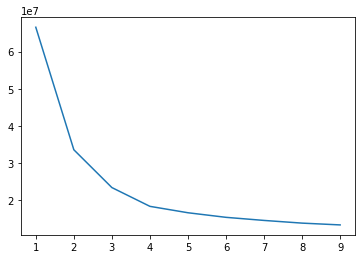

In [16]:
fig=plt.figure()

ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

In [17]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(f19)
preds=clusters.fit_predict(f19)
f19['cluster']=preds

In [18]:
f19.cluster.value_counts()

0    5101
1     647
Name: cluster, dtype: int64

In [19]:
f19

,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,cluster
0,94.0,94.0,35.0,79.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0.0,1.0,0
1,94.0,94.0,32.0,61.0,77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1.0,0.0,0
2,92.0,93.0,32.0,59.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0.0,1.0,0
3,91.0,93.0,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,0.0,1.0,1
4,91.0,92.0,60.0,78.0,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17719,49.0,55.0,17.0,52.0,34.0,49.0,44.0,38.0,37.0,50.0,39.0,26.0,33.0,48.0,64.0,74.0,56.0,47.0,65.0,42.0,62.0,48.0,60.0,43.0,35.0,16.0,42.0,45.0,62.0,14.0,13.0,13.0,12.0,13.0,16.0,9.0,14.0,0.0,1.0,0
17722,48.0,69.0,18.0,43.0,32.0,53.0,45.0,37.0,35.0,44.0,39.0,32.0,32.0,46.0,52.0,54.0,53.0,47.0,55.0,46.0,68.0,51.0,44.0,41.0,25.0,13.0,48.0,41.0,55.0,18.0,16.0,11.0,6.0,9.0,11.0,7.0,12.0,0.0,1.0,0
17743,48.0,58.0,0.0,0.0,19.0,15.0,15.0,26.0,14.0,13.0,12.0,19.0,19.0,25.0,40.0,42.0,45.0,47.0,52.0,25.0,55.0,33.0,58.0,20.0,20.0,29.0,13.0,20.0,29.0,12.0,15.0,16.0,45.0,49.0,50.0,50.0,45.0,0.0,1.0,1
17753,47.0,65.0,49.0,59.0,23.0,19.0,48.0,28.0,29.0,25.0,25.0,23.0,27.0,29.0,58.0,56.0,45.0,48.0,55.0,39.0,67.0,62.0,62.0,18.0,44.0,47.0,24.0,26.0,39.0,45.0,54.0,51.0,13.0,8.0,14.0,8.0,6.0,0.0,1.0,0


In [20]:
f19_1 = f19[f19['cluster']==0]

In [21]:
inercia=[KMeans(n_clusters=x).fit(f19_1).inertia_ for x in range(1, 10)]
n_clusters=[x for x in range(1, 10)]

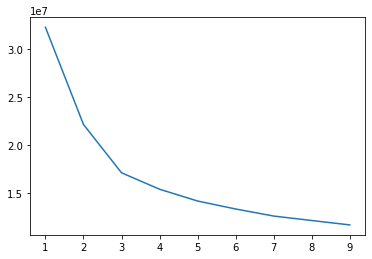

In [22]:
fig=plt.figure()

ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

In [23]:
kmeans=KMeans(n_clusters=3)
clusters=kmeans.fit(f19_1)
preds=clusters.fit_predict(f19_1)
f19_1['cluster']=preds

/tmp/ipykernel_366/4089403827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f19_1['cluster']=preds


In [24]:
f19_1.cluster.value_counts()

2    1893
1    1689
0    1519
Name: cluster, dtype: int64

In [25]:
f19_1[f19_1['cluster']==1]

,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,cluster
4,91.0,92.0,60.0,78.0,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0.0,1.0,1
6,91.0,91.0,52.0,85.0,77.0,94.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,93.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,0.0,1.0,1
12,90.0,90.0,89.0,84.0,55.0,42.0,92.0,79.0,47.0,53.0,49.0,51.0,70.0,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,90.0,43.0,88.0,88.0,48.0,52.0,50.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,0.0,1.0,1
18,89.0,92.0,47.0,83.0,75.0,94.0,85.0,80.0,82.0,80.0,78.0,68.0,82.0,84.0,68.0,72.0,71.0,91.0,71.0,88.0,78.0,89.0,84.0,85.0,76.0,35.0,93.0,80.0,90.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,0.0,1.0,1
19,89.0,90.0,50.0,70.0,82.0,92.0,84.0,82.0,87.0,88.0,84.0,76.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,81.0,62.0,82.0,69.0,35.0,91.0,81.0,74.0,59.0,43.0,44.0,14.0,8.0,14.0,13.0,14.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14152,61.0,61.0,58.0,65.0,53.0,46.0,50.0,66.0,47.0,53.0,51.0,55.0,62.0,62.0,73.0,69.0,66.0,61.0,84.0,62.0,80.0,80.0,60.0,51.0,57.0,60.0,50.0,50.0,52.0,57.0,60.0,62.0,13.0,12.0,12.0,13.0,16.0,0.0,1.0,1
14219,61.0,61.0,58.0,61.0,50.0,50.0,43.0,69.0,40.0,55.0,44.0,48.0,67.0,56.0,78.0,80.0,92.0,55.0,90.0,54.0,70.0,73.0,51.0,53.0,67.0,53.0,56.0,50.0,54.0,62.0,63.0,56.0,14.0,10.0,6.0,14.0,10.0,0.0,1.0,1
14897,59.0,80.0,54.0,52.0,50.0,58.0,47.0,64.0,47.0,64.0,50.0,42.0,58.0,62.0,65.0,64.0,73.0,59.0,78.0,57.0,59.0,54.0,48.0,50.0,59.0,55.0,62.0,63.0,53.0,47.0,60.0,57.0,12.0,11.0,6.0,14.0,12.0,0.0,1.0,1
15042,59.0,70.0,54.0,59.0,59.0,53.0,54.0,64.0,56.0,59.0,56.0,60.0,60.0,63.0,65.0,61.0,66.0,60.0,57.0,65.0,53.0,55.0,64.0,46.0,55.0,35.0,53.0,56.0,60.0,61.0,58.0,61.0,7.0,8.0,15.0,7.0,12.0,1.0,0.0,1


In [26]:
f=pd.read_csv('players_19.csv')
f19_1['player_positions']=f.player_positions
f19_1.head()

/tmp/ipykernel_366/3634379949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f19_1['player_positions']=f.player_positions


,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,cluster,player_positions
0,94.0,94.0,35.0,79.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0.0,1.0,2,"ST, LW"
1,94.0,94.0,32.0,61.0,77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1.0,0.0,2,"CF, RW, ST"
2,92.0,93.0,32.0,59.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0.0,1.0,2,"LW, CAM"
4,91.0,92.0,60.0,78.0,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0.0,1.0,1,"CAM, CM"
6,91.0,91.0,52.0,85.0,77.0,94.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,93.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,0.0,1.0,1,ST


In [27]:
f19_1[f19_1['cluster']==1 ].player_positions.value_counts()

CM, CDM           198
CDM, CM           184
CM                120
LB                103
RB                 88
                 ... 
CDM, LWB, LB        1
RM, RB, RW          1
ST, RWB, RM         1
RW, LW              1
LM, CM, RM, RB      1
Name: player_positions, Length: 279, dtype: int64

In [28]:
f19_1[f19_1['cluster']== 0 ].player_positions.value_counts()

CB                 641
LB                  97
RB                  87
CB, RB              75
CDM, CM             55
                  ... 
CDM, RB, CB, CM      1
CB, LB, LM           1
CM, RB, CDM, LB      1
LB, CB, CDM, RB      1
CAM, LM, LB          1
Name: player_positions, Length: 110, dtype: int64

In [29]:
f19_1[f19_1['cluster']==2 ].player_positions.value_counts()

ST                 565
LM, RM              68
RM, LM              68
CAM                 67
RM                  64
                  ... 
CF, CAM, RW, LW      1
CF, LM, ST, CAM      1
ST, CAM, RW, LW      1
ST, RW, LM           1
ST, CAM, RW          1
Name: player_positions, Length: 271, dtype: int64

In [30]:
f19_1[f19_1['cluster']==0 ].describe()

,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,cluster
count,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.0
mean,65.967084,72.783410,64.535221,68.342330,46.112574,31.289006,61.964450,59.069124,32.336406,50.369322,38.739961,34.883476,53.175774,56.915076,61.160632,62.547729,57.304806,60.871626,59.193548,49.146807,68.420013,65.104674,70.979592,35.307439,65.645820,63.425280,39.456880,44.526004,41.441738,63.438446,66.880184,65.028966,10.440421,10.517446,10.368664,10.497696,10.460171,0.265306,0.734694,0.0
std,6.757144,5.758521,8.108205,8.147681,13.500982,9.307233,10.638325,9.510404,8.242100,11.601753,10.750564,9.620068,11.473923,9.092485,11.455269,11.338088,11.629487,7.902567,12.003543,11.977533,10.333823,9.981945,11.615955,11.288160,10.241338,9.075996,12.116282,10.697134,8.595453,9.174921,7.890063,7.635587,3.094723,3.100776,3.168682,3.083355,3.080747,0.441641,0.441641,0.0
min,47.000000,51.000000,37.000000,33.000000,11.000000,10.000000,22.000000,26.000000,11.000000,16.000000,11.000000,10.000000,21.000000,28.000000,22.000000,26.000000,27.000000,40.000000,26.000000,14.000000,30.000000,30.000000,29.000000,11.000000,35.000000,27.000000,12.000000,12.000000,11.000000,28.000000,34.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,61.000000,69.000000,59.000000,63.000000,35.000000,24.000000,54.000000,55.000000,27.000000,43.000000,31.000000,29.000000,46.000000,52.000000,54.000000,55.000000,50.000000,55.000000,52.000000,41.000000,62.000000,60.000000,64.000000,27.000000,58.000000,57.000000,29.000000,36.000000,36.000000,58.000000,62.000000,60.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.0
50%,66.000000,72.000000,64.000000,70.000000,46.000000,30.000000,62.000000,61.000000,32.000000,53.000000,37.000000,34.000000,55.000000,59.000000,63.000000,64.000000,58.000000,61.000000,60.000000,49.000000,69.000000,65.000000,72.000000,34.000000,66.000000,63.000000,39.000000,45.000000,41.000000,63.000000,66.000000,65.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,1.000000,0.0
75%,70.000000,76.500000,70.000000,74.000000,58.000000,38.000000,70.000000,65.000000,37.000000,59.000000,46.000000,40.000000,61.000000,63.000000,69.000000,70.000000,66.000000,66.000000,67.000000,58.000000,75.000000,72.000000,79.000000,43.000000,73.000000,69.000000,49.000000,53.000000,46.000000,70.000000,72.000000,70.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.000000,1.000000,0.0
max,89.000000,92.000000,91.000000,88.000000,77.000000,68.000000,90.000000,81.000000,62.000000,73.000000,75.000000,77.000000,80.000000,78.000000,91.000000,95.000000,90.000000,85.000000,91.000000,87.000000,93.000000,94.000000,94.000000,73.000000,94.000000,90.000000,68.000000,70.000000,76.000000,94.000000,93.000000,90.000000,32.000000,33.000000,38.000000,32.000000,34.000000,1.000000,1.000000,0.0


In [31]:
f19_1[f19_1['cluster']==1 ].describe()

,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,cluster
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.0
mean,73.111901,76.515098,66.602131,70.825933,66.512137,54.918887,60.710480,72.979278,54.252220,69.592658,63.409118,57.720545,69.104204,72.343991,69.139728,68.798105,70.132031,70.432800,69.496152,69.520426,68.619893,75.246892,68.922439,62.963884,70.497928,67.750740,63.269390,66.743043,56.737123,65.796921,68.747780,65.850799,10.542333,10.474245,10.512137,10.609236,10.597395,0.293665,0.706335,1.0
std,5.510108,5.700454,8.260231,7.179933,9.625081,11.673021,10.697904,6.025237,12.311001,7.424093,11.356573,13.132304,6.999647,6.297198,10.196733,10.864639,8.715472,6.935067,10.162140,8.902099,10.736227,9.443460,9.405833,10.688469,10.023321,9.395158,9.463901,9.002714,10.852831,9.798241,8.672782,10.117977,3.156767,3.178080,3.224058,3.252969,3.199362,0.455575,0.455575,0.0
min,58.000000,61.000000,45.000000,39.000000,33.000000,17.000000,23.000000,52.000000,19.000000,42.000000,23.000000,17.000000,42.000000,54.000000,30.000000,30.000000,34.000000,48.000000,28.000000,34.000000,30.000000,32.000000,30.000000,24.000000,30.000000,31.000000,27.000000,34.000000,22.000000,20.000000,36.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,69.000000,72.000000,61.000000,67.000000,60.000000,47.000000,54.000000,69.000000,45.000000,64.000000,56.000000,48.000000,65.000000,68.000000,64.000000,64.000000,65.000000,65.000000,64.000000,63.000000,62.000000,69.000000,64.000000,56.000000,65.000000,62.000000,58.000000,61.000000,49.000000,60.000000,63.000000,60.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,1.0
50%,73.000000,77.000000,67.000000,71.000000,67.000000,55.000000,60.000000,73.000000,54.000000,69.000000,64.000000,59.000000,69.000000,72.000000,69.000000,69.000000,70.000000,70.000000,70.000000,70.000000,69.000000,76.000000,69.000000,64.000000,71.000000,69.000000,64.000000,67.000000,56.000000,67.000000,70.000000,67.000000,11.000000,10.000000,10.000000,10.000000,11.000000,0.000000,1.000000,1.0
75%,77.000000,81.000000,72.000000,76.000000,74.000000,63.000000,68.000000,77.000000,63.000000,75.000000,72.000000,68.000000,74.000000,76.000000,76.000000,76.000000,76.000000,75.000000,76.000000,76.000000,76.000000,81.000000,75.000000,70.000000,77.000000,74.000000,70.000000,73.000000,64.000000,72.000000,75.000000,73.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.000000,1.000000,1.0
max,91.000000,92.000000,89.000000,89.000000,93.000000,94.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,93.000000,95.000000,94.000000,92.000000,93.000000,94.000000,92.000000,94.000000,96.000000,94.000000,91.000000,94.000000,92.000000,93.000000,94.000000,91.000000,91.000000,91.000000,90.000000,27.000000,25.000000,31.000000,33.000000,37.000000,1.000000,1.000000,1.0


In [32]:
f19_1[f19_1['cluster']==2 ].describe()

,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,cluster
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.00000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.0
mean,68.127311,74.641310,33.746434,60.057052,56.954041,64.707343,55.442155,64.016376,58.658214,68.79028,58.481247,51.497623,53.921817,68.634443,73.370840,73.109350,72.379820,63.460116,70.406233,66.956683,63.997887,63.504490,61.776545,60.869519,50.325409,30.291601,65.183307,60.958267,61.296883,33.370312,30.817221,28.256207,10.379292,10.581088,10.502905,10.324353,10.498679,0.233492,0.766508,2.0
std,7.149798,6.073695,7.924201,10.302092,13.138211,9.590061,13.579593,8.566322,11.099537,8.74370,12.741838,14.106572,11.830606,8.216579,10.758193,10.153535,10.977054,9.457489,11.873065,9.185844,12.544677,10.864999,14.064832,10.454744,13.989152,10.932839,9.973098,9.978192,9.549004,11.384204,10.798235,10.729687,3.053233,3.026556,3.171893,3.067325,3.156192,0.423164,0.423164,0.0
min,48.000000,55.000000,16.000000,30.000000,11.000000,24.000000,18.000000,34.000000,18.000000,39.00000,22.000000,22.000000,22.000000,42.000000,29.000000,32.000000,32.000000,37.000000,28.000000,30.000000,29.000000,31.000000,28.000000,29.000000,13.000000,10.000000,32.000000,21.000000,21.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.0
25%,63.000000,70.000000,28.000000,53.000000,48.000000,59.000000,45.000000,59.000000,51.000000,63.00000,49.000000,40.000000,45.000000,63.000000,67.000000,67.000000,66.000000,57.000000,64.000000,61.000000,56.000000,56.000000,53.000000,55.000000,39.000000,22.000000,58.000000,54.000000,55.000000,25.000000,22.000000,20.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.000000,2.0
50%,68.000000,75.000000,33.000000,61.000000,59.000000,65.000000,55.000000,64.000000,58.000000,69.00000,59.000000,50.000000,55.000000,69.000000,74.000000,74.000000,73.000000,63.000000,71.000000,68.000000,65.000000,65.000000,62.000000,62.000000,49.000000,29.000000,65.000000,61.000000,61.000000,32.000000,30.000000,26.000000,10.000000,11.000000,11.000000,10.000000,11.000000,0.000000,1.000000,2.0
75%,73.000000,79.000000,39.000000,67.000000,66.000000,71.000000,66.000000,69.000000,67.000000,75.00000,68.000000,63.000000,63.000000,74.000000,80.000000,79.000000,80.000000,70.000000,78.000000,74.000000,73.000000,71.000000,72.000000,68.000000,60.000000,38.000000,72.000000,68.000000,68.000000,41.000000,39.000000,35.000000,13.000000,13.000000,13.000000,13.000000,13.000000,0.000000,1.000000,2.0
max,94.000000,95.000000,55.000000,88.000000,91.000000,95.000000,94.000000,90.000000,90.000000,97.00000,93.000000,94.000000,87.000000,96.000000,97.000000,96.000000,96.000000,96.000000,99.000000,95.000000,95.000000,91.000000,95.000000,94.000000,94.000000,70.000000,95.000000,94.000000,92.000000,68.000000,65.000000,65.000000,17.000000,16.000000,41.000000,17.000000,21.000000,1.000000,1.000000,2.0


In [33]:
###############

In [34]:
f19[f19['cluster']==0 ].describe()

,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,cluster
count,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.00000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.0
mean,69.134483,74.708489,53.793766,66.089982,56.890414,51.514801,59.128798,65.510880,49.361106,63.570476,54.234268,48.610665,58.726720,66.372868,68.333856,68.536757,67.146442,64.998040,66.765928,62.502058,66.845128,67.869045,66.883160,53.95099,61.566948,52.561459,56.888649,57.980396,53.874534,53.060968,54.115468,51.654578,10.451480,10.526759,10.465987,10.470300,10.519898,0.262890,0.737110,0.0
std,7.155935,6.041288,17.415978,9.931942,14.635973,17.183782,12.175549,9.890445,15.569873,12.676657,15.601113,15.657315,12.678228,10.155119,11.889742,11.577771,12.331433,9.133455,12.402803,13.305485,11.537234,11.416693,12.604966,16.26290,14.674737,19.842349,15.484330,13.433453,12.806384,18.292557,20.189004,20.424962,3.100324,3.099197,3.188317,3.136401,3.148272,0.440246,0.440246,0.0
min,47.000000,51.000000,16.000000,30.000000,11.000000,10.000000,18.000000,26.000000,11.000000,16.000000,11.000000,10.000000,21.000000,28.000000,22.000000,26.000000,27.000000,37.000000,26.000000,14.000000,29.000000,30.000000,28.000000,11.00000,13.000000,10.000000,12.000000,12.000000,11.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,64.000000,70.000000,38.000000,60.000000,47.000000,38.000000,51.000000,60.000000,37.000000,58.000000,42.000000,36.000000,51.000000,61.000000,62.000000,63.000000,60.000000,59.000000,60.000000,55.000000,60.000000,61.000000,60.000000,42.00000,52.000000,35.000000,48.000000,49.000000,44.000000,38.000000,36.000000,32.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.0
50%,69.000000,75.000000,59.000000,68.000000,59.000000,54.000000,60.000000,66.000000,50.000000,65.000000,55.000000,47.000000,60.000000,67.000000,69.000000,69.000000,68.000000,65.000000,68.000000,64.000000,68.000000,68.000000,68.000000,57.00000,64.000000,58.000000,59.000000,59.000000,54.000000,58.000000,62.000000,59.000000,11.000000,11.000000,10.000000,10.000000,11.000000,0.000000,1.000000,0.0
75%,74.000000,79.000000,68.000000,73.000000,68.000000,65.000000,68.000000,72.000000,61.000000,72.000000,67.000000,61.000000,68.000000,73.000000,76.000000,76.000000,76.000000,72.000000,75.000000,72.000000,74.000000,76.000000,76.000000,66.00000,73.000000,68.000000,68.000000,68.000000,63.000000,68.000000,70.000000,68.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.000000,1.000000,0.0
max,94.000000,95.000000,91.000000,89.000000,93.000000,95.000000,94.000000,92.000000,90.000000,97.000000,93.000000,94.000000,91.000000,96.000000,97.000000,96.000000,96.000000,96.000000,99.000000,95.000000,95.000000,96.000000,95.000000,94.00000,94.000000,92.000000,95.000000,94.000000,92.000000,94.000000,93.000000,90.000000,32.000000,33.000000,41.000000,33.000000,37.000000,1.000000,1.000000,0.0


In [35]:
f19[f19['cluster']==1 ].describe()

,overall,potential,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,cluster
count,647.000000,647.000000,647.0,647.0,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.0
mean,67.296754,72.731066,0.0,0.0,14.021638,12.148377,14.241113,28.510046,12.659969,14.071097,14.531685,14.276662,27.112828,20.884080,39.962906,40.102009,42.102009,61.877898,42.244204,23.276662,59.442040,30.822257,61.729521,12.792890,26.448223,17.488408,11.332303,37.497682,20.800618,14.519320,14.037094,14.117465,68.363215,65.302937,63.131376,65.619784,68.950541,0.123648,0.876352,1.0
std,8.152477,6.469649,0.0,0.0,3.693291,3.836793,3.648738,8.202137,4.063961,4.298234,3.891942,4.067061,8.499204,6.287033,10.719121,10.692382,11.518276,10.735301,10.643201,7.209973,11.933613,7.540865,10.744836,3.971307,7.641343,5.816287,3.956723,12.132508,7.007877,5.156605,3.270827,3.342908,8.076419,8.234059,8.045520,8.977825,8.629672,0.329434,0.329434,0.0
min,47.000000,50.000000,0.0,0.0,5.000000,2.000000,5.000000,11.000000,4.000000,4.000000,6.000000,3.000000,8.000000,9.000000,13.000000,14.000000,18.000000,31.000000,16.000000,3.000000,22.000000,12.000000,24.000000,4.000000,11.000000,5.000000,3.000000,10.000000,9.000000,3.000000,7.000000,7.000000,45.000000,44.000000,35.000000,40.000000,44.000000,0.000000,0.000000,1.0
25%,61.000000,68.000000,0.0,0.0,11.000000,9.000000,12.000000,23.000000,10.000000,11.000000,12.000000,12.000000,21.000000,17.000000,32.000000,33.000000,34.000000,55.000000,35.000000,19.000000,53.000000,25.000000,55.000000,10.000000,21.000000,13.000000,8.000000,29.000000,16.000000,11.000000,12.000000,12.000000,63.000000,60.000000,58.000000,59.000000,63.000000,0.000000,1.000000,1.0
50%,67.000000,72.000000,0.0,0.0,13.000000,12.000000,14.000000,28.000000,13.000000,14.000000,14.000000,13.000000,26.000000,21.000000,41.000000,42.000000,40.000000,63.000000,42.000000,22.000000,61.000000,31.000000,63.000000,13.000000,25.000000,18.000000,11.000000,37.000000,21.000000,14.000000,13.000000,13.000000,68.000000,65.000000,63.000000,66.000000,69.000000,0.000000,1.000000,1.0
75%,73.000000,77.000000,0.0,0.0,15.000000,15.000000,16.000000,33.000000,15.000000,17.000000,16.000000,16.000000,33.000000,24.000000,48.000000,47.000000,50.000000,70.000000,50.000000,25.000000,68.000000,36.000000,69.000000,16.000000,32.000000,22.000000,14.000000,45.000000,24.000000,18.000000,16.000000,16.000000,74.000000,71.000000,68.000000,72.000000,75.000000,0.000000,1.000000,1.0
max,91.000000,93.000000,0.0,0.0,35.000000,27.000000,47.000000,64.000000,26.000000,30.000000,34.000000,57.000000,56.000000,42.000000,67.000000,65.000000,78.000000,90.000000,77.000000,60.000000,84.000000,45.000000,85.000000,27.000000,64.000000,33.000000,20.000000,70.000000,46.000000,30.000000,25.000000,41.000000,90.000000,92.000000,90.000000,90.000000,94.000000,1.000000,1.000000,1.0


In [36]:
f19['player_positions']=f.player_positions

In [37]:
f19[f19['cluster']== 0 ].player_positions.value_counts()

CB                  720
ST                  575
CDM, CM             239
CM, CDM             238
CM                  202
                   ... 
CAM, CDM, RM, CM      1
LM, CF, ST, RM        1
LWB, LB, LM, LW       1
CAM, CF, RM, LM       1
CAM, LM, LB           1
Name: player_positions, Length: 504, dtype: int64

In [38]:
f19[f19['cluster']== 1 ].player_positions.value_counts()

GK    647
Name: player_positions, dtype: int64

In [39]:
f19 =pd.get_dummies(data=f19, columns=['cluster'])

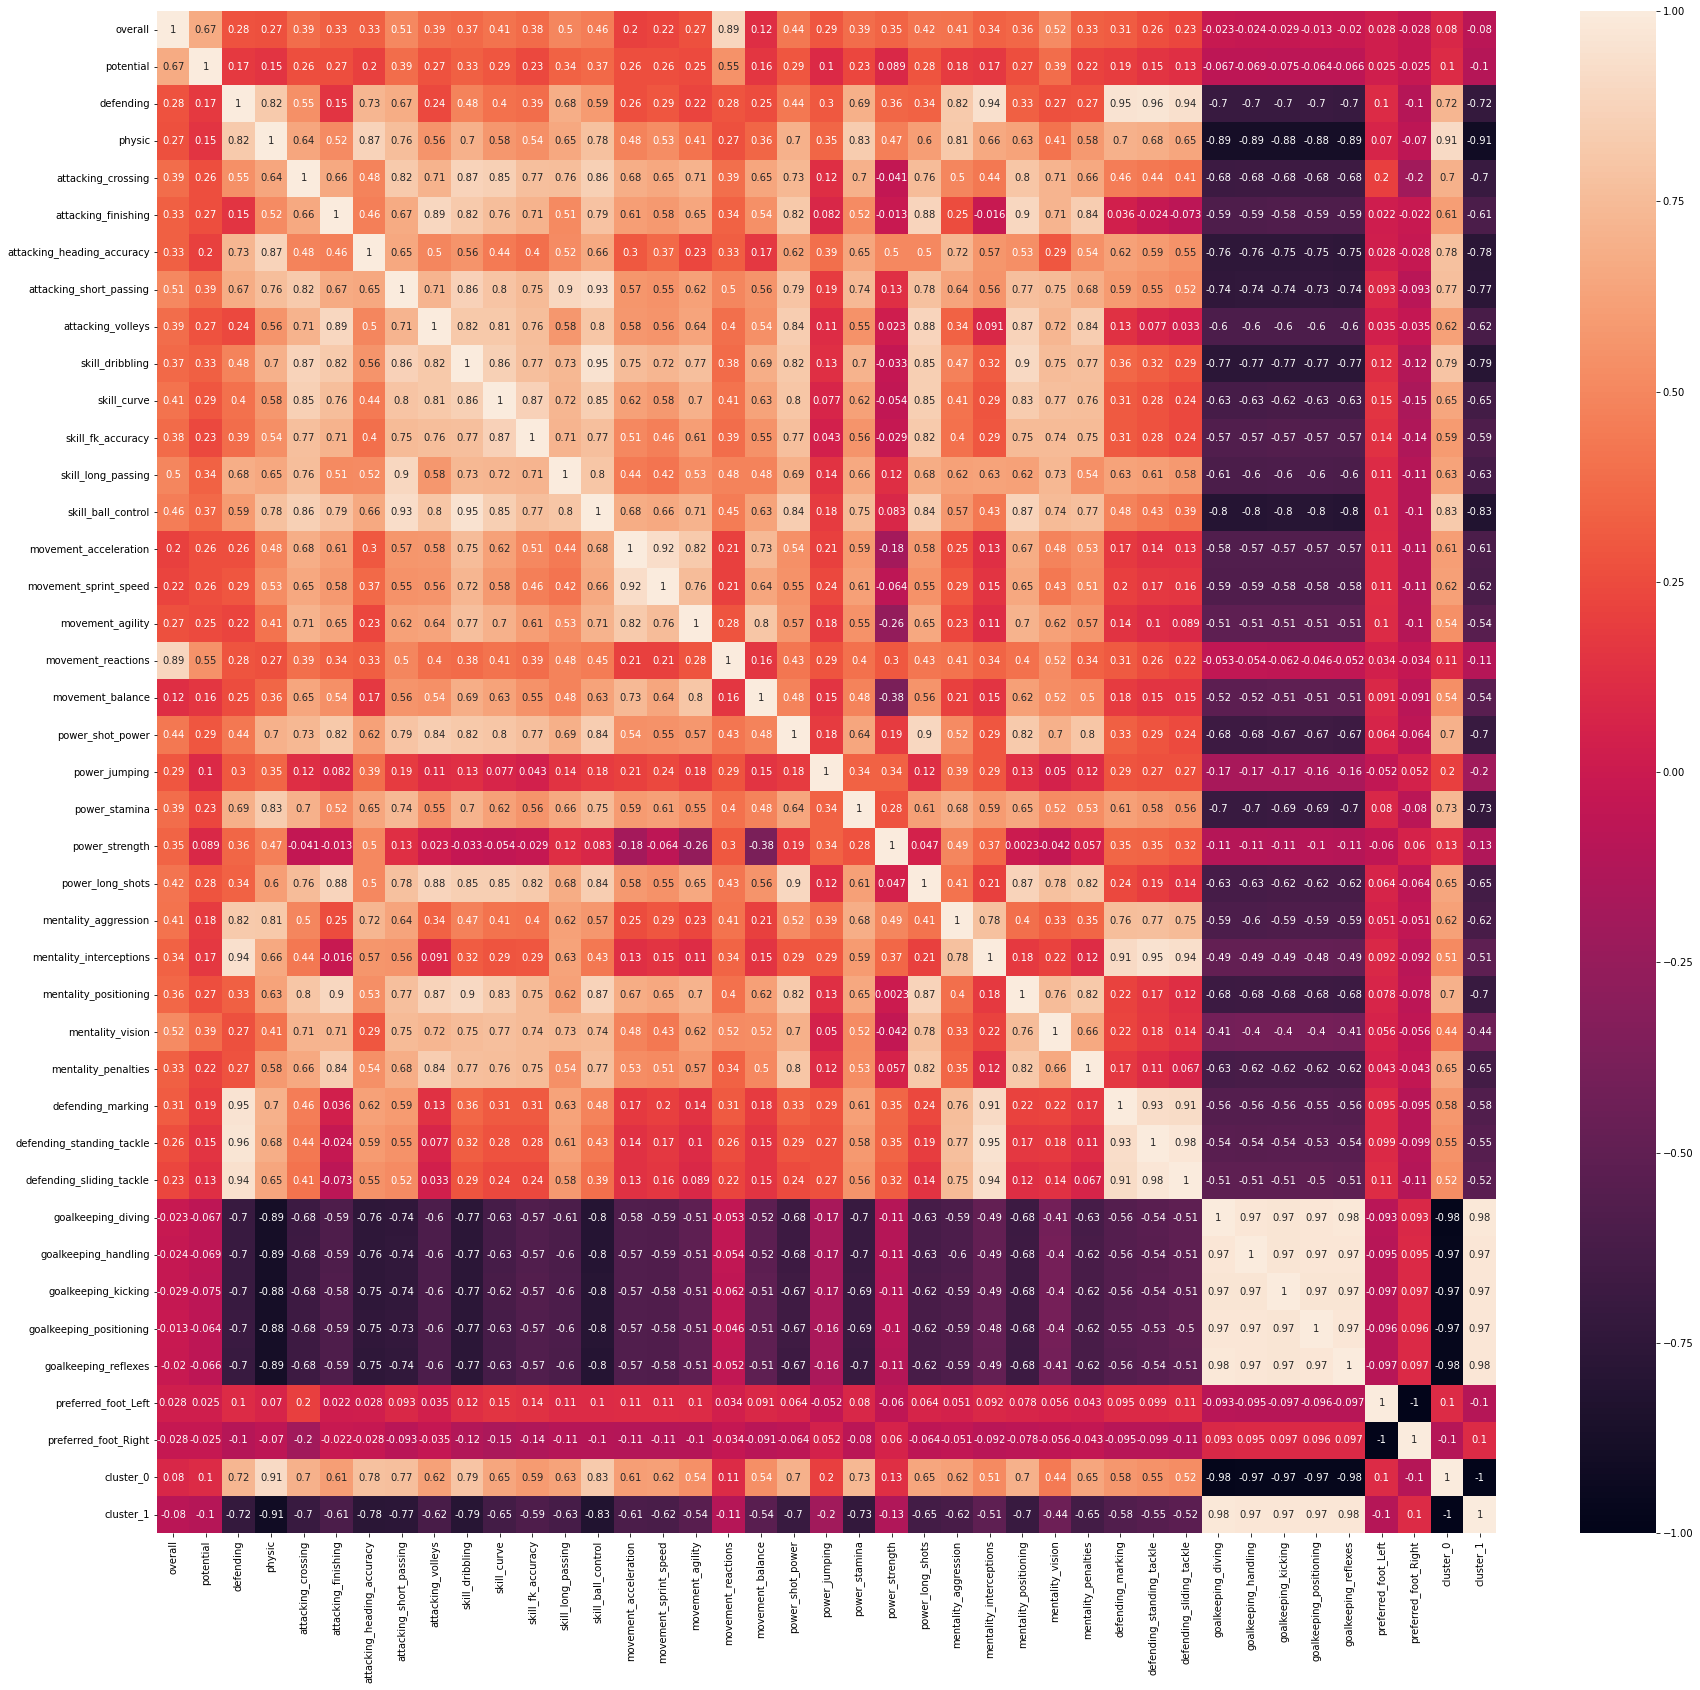

In [40]:
corr_df = f19.corr(method='pearson')

plt.figure(figsize=(30, 28))
sns.heatmap(corr_df, annot=True)
plt.show()

In [41]:
f19_1 =pd.get_dummies(data=f19_1, columns=['cluster'])

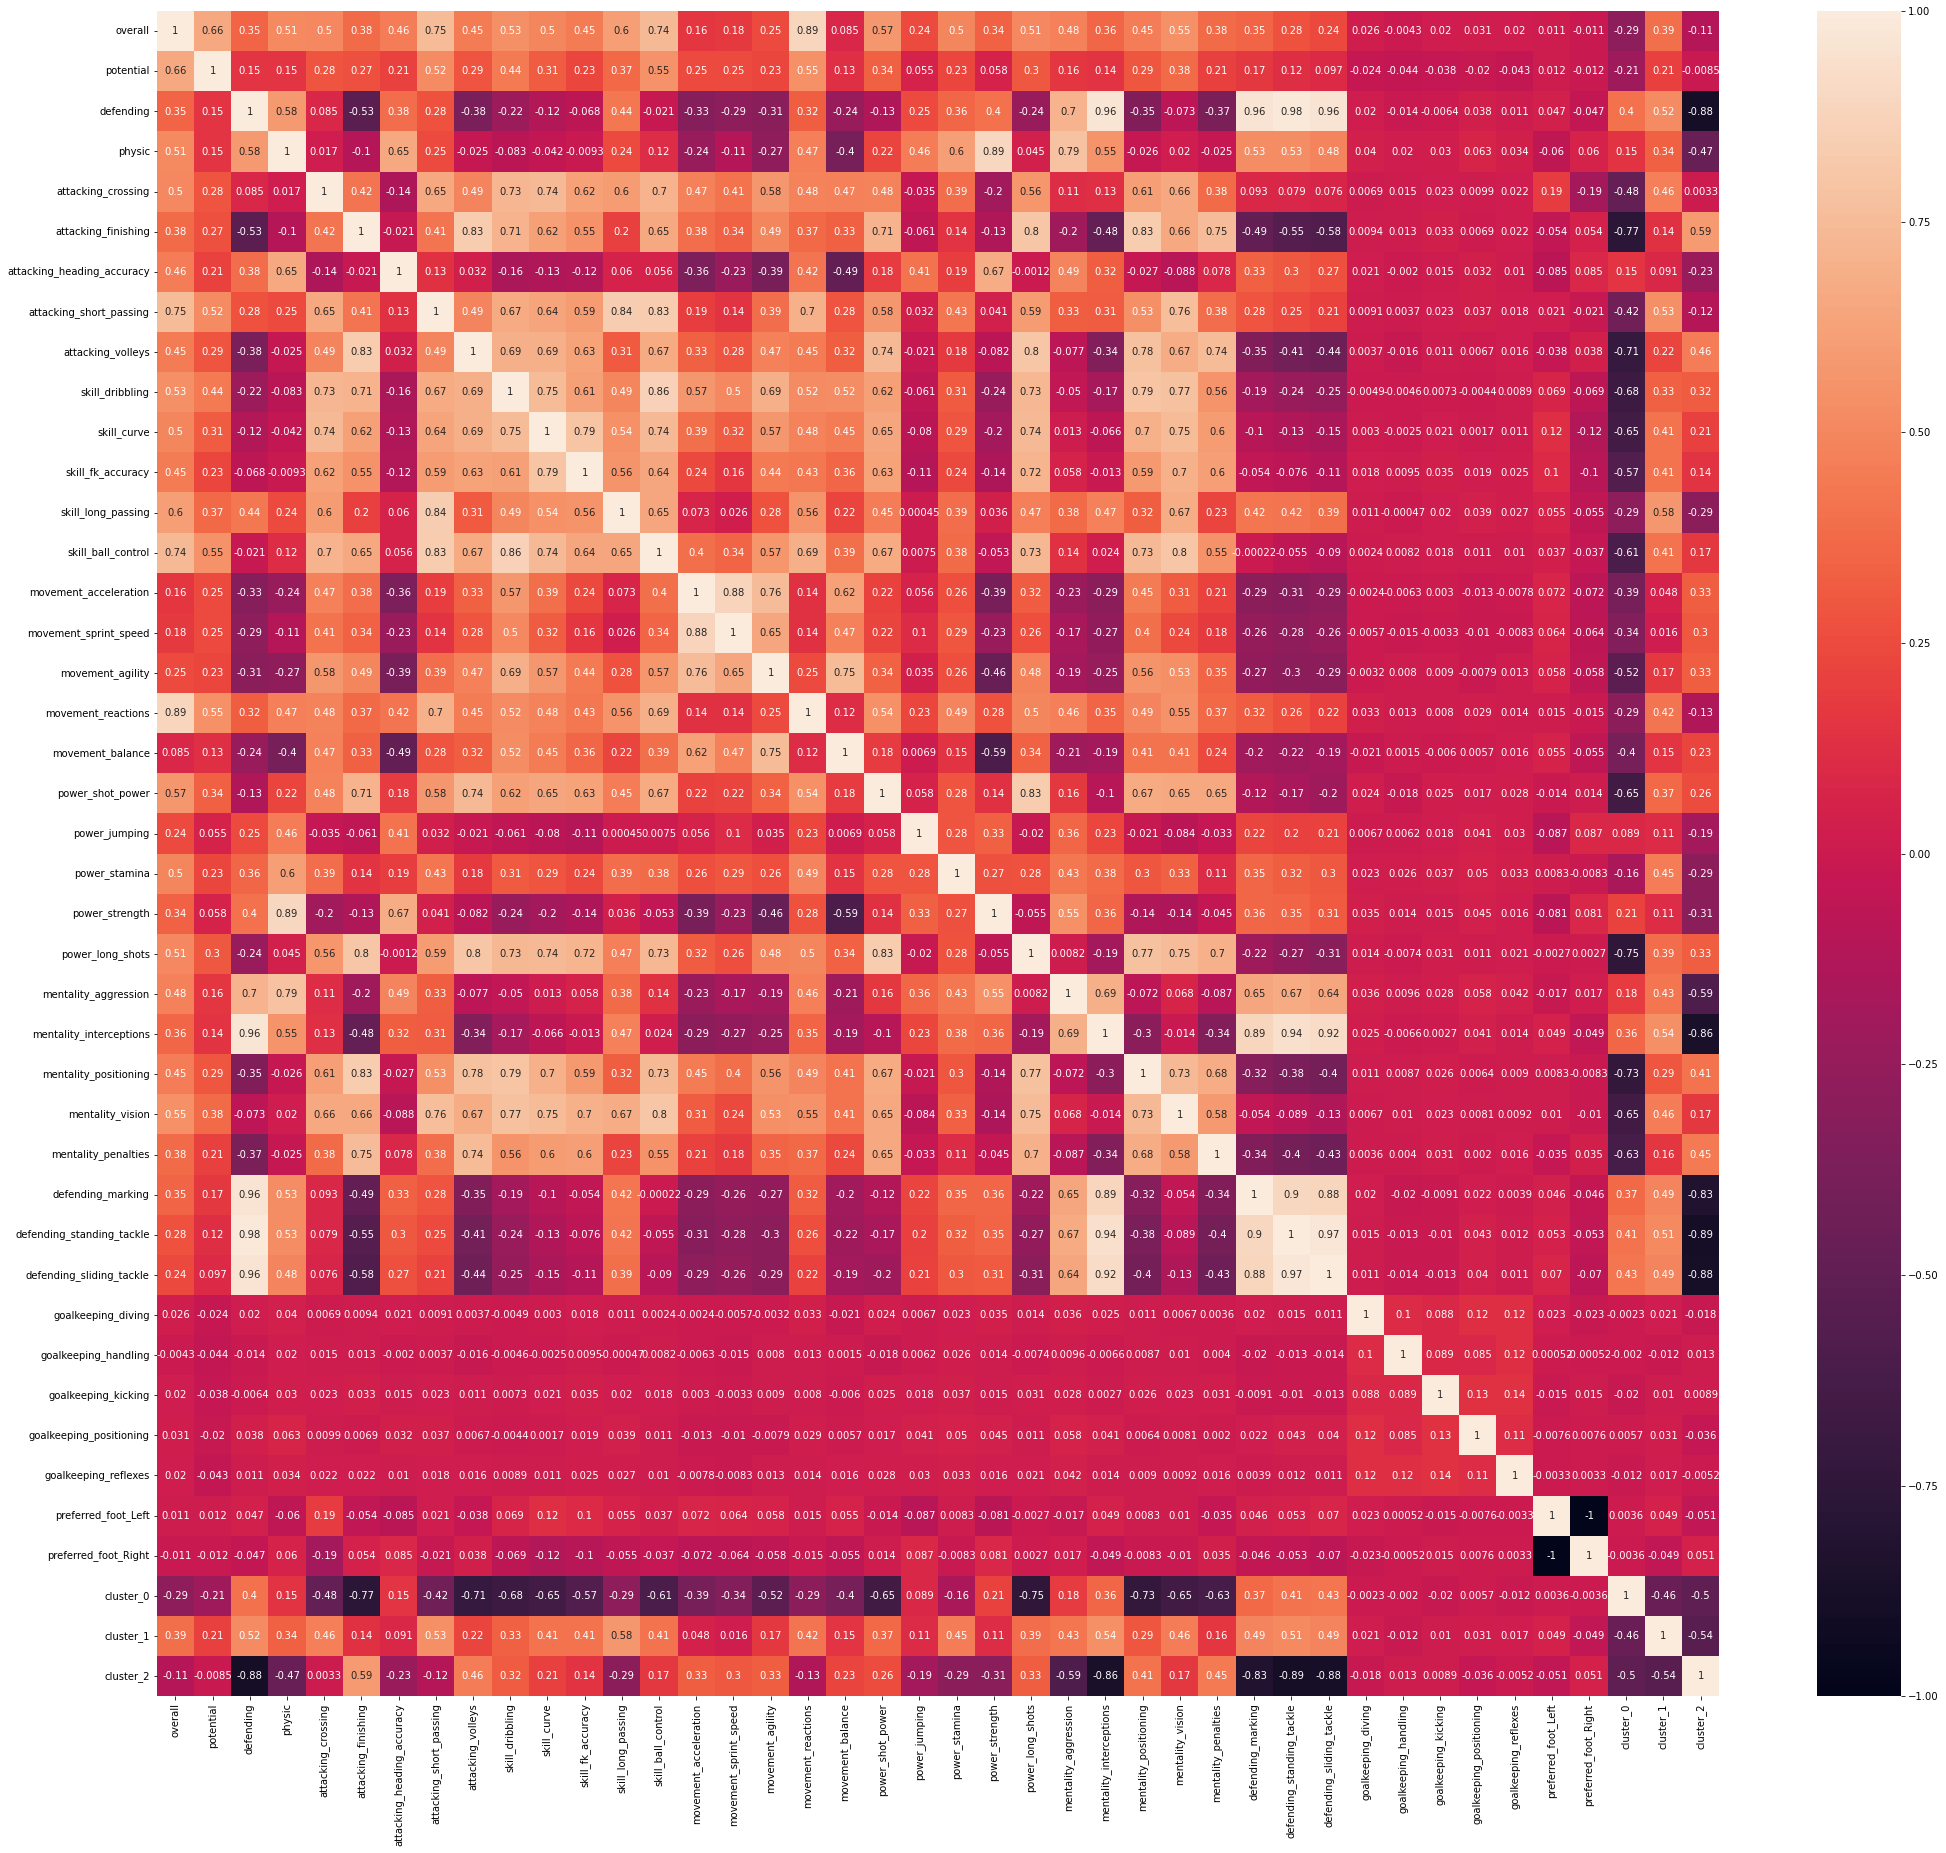

In [42]:
corr_df1 = f19_1.corr(method='pearson')

plt.figure(figsize=(35,31))
sns.heatmap(corr_df1, annot=True)
plt.show()

In [43]:
f19_1.to_csv("f19_1clust.csv",index=False) 
f19.to_csv("f19_origen.csv",index=False) 